In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()#upload wine.csv

Saving wine.csv to wine.csv


In [ ]:
import io
wine = pd.read_csv(io.BytesIO(uploaded['wine.csv']))

In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


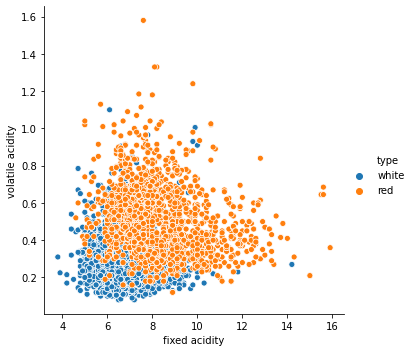

In [ ]:

sns.relplot(x = 'fixed acidity', y = 'volatile acidity',data = wine,hue='type');

In [ ]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [ ]:
# Looking at number of missing values using 'isnull()' function
print( 'Columns and number of missing values')
for column in wine.columns:
    print(column +":" + str(wine[column].isnull().sum()))

Columns and number of missing values
type:0
fixed acidity:10
volatile acidity:8
citric acid:3
residual sugar:2
chlorides:2
free sulfur dioxide:0
total sulfur dioxide:0
density:0
pH:9
sulphates:4
alcohol:0
quality:0


In [ ]:
wine['residual sugar'].median()

3.0

In [ ]:
wine['residual sugar']=wine['residual sugar'].fillna(wine['residual sugar'].median())

In [ ]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           0
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
wine['fixed acidity'].median()
wine['fixed acidity']=wine['fixed acidity'].fillna(wine['fixed acidity'].median())

In [ ]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          0
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine['volatile acidity'].median()

0.29

In [ ]:
wine['volatile acidity']=wine['volatile acidity'].fillna(wine['volatile acidity'].median())

In [ ]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             3
residual sugar          0
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine['pH'].median()
wine['pH']=wine['pH'].fillna(wine['pH'].median())
wine['citric acid'].median()
wine['citric acid']=wine['citric acid'].fillna(wine['citric acid'].median())
wine['chlorides']=wine['chlorides'].median()
wine['chlorides']=wine['chlorides'].fillna(wine['chlorides'].median())
wine['sulphates'].median()
wine['sulphates']=wine['sulphates'].fillna(wine['sulphates'].median())

In [ ]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine=wine.drop(columns=['density','quality'])


In [ ]:
wine=wine.drop_duplicates().copy()


In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.047,45.0,170.0,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.047,14.0,132.0,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.047,30.0,97.0,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.047,47.0,186.0,3.19,0.40,9.9
6,white,6.2,0.320,0.16,7.0,0.047,30.0,136.0,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.047,28.0,38.0,3.42,0.82,9.5
6492,red,6.2,0.600,0.08,2.0,0.047,32.0,44.0,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.047,39.0,51.0,3.52,0.51,11.2
6495,red,5.9,0.645,0.12,2.0,0.047,32.0,44.0,3.57,0.71,10.2


In [ ]:
wine.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
wine_feature=wine.loc[:,['fixed acidity','volatile acidity','residual sugar','pH','alcohol']]
wine_feature.head(10)

,fixed acidity,volatile acidity,residual sugar,pH,alcohol
0,7.0,0.27,20.70,3.00,8.8
1,6.3,0.30,1.60,3.30,9.5
2,8.1,0.28,6.90,3.26,10.1
3,7.2,0.23,8.50,3.19,9.9
6,6.2,0.32,7.00,3.18,9.6
9,8.1,0.22,1.50,3.22,11.0
10,8.1,0.27,1.45,2.99,12.0
11,8.6,0.23,4.20,3.14,9.7
12,7.9,0.18,1.20,3.18,10.8
13,6.6,0.16,1.50,3.54,12.4


In [ ]:
wine_label=wine.loc[:,['type']]
wine_label.tail(10)

,type
6486,red
6487,red
6488,red
6489,red
6490,red
6491,red
6492,red
6493,red
6495,red
6496,red


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(wine_feature,wine_label,random_state=0,test_size =0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr = lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_lr=lr.predict(X_test)
print("The predicted values are:",y_pred_lr)

The predicted values are: ['red' 'white' 'white' ... 'red' 'white' 'white']


In [ ]:
from sklearn import metrics
accuracy_lr  = metrics.accuracy_score(y_test,y_pred_lr)
print("Accuracy of the Logistic regression:",accuracy_lr)

Accuracy of the Logistic regression: 0.9634146341463414


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
print ( "Confusion Matrix of Logistic Regression: \n", cm)

Confusion Matrix of Logistic Regression: 
 [[248  25]
 [ 14 779]]


In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.047,45.0,170.0,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.047,14.0,132.0,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.047,30.0,97.0,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.047,47.0,186.0,3.19,0.40,9.9
6,white,6.2,0.320,0.16,7.0,0.047,30.0,136.0,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.047,28.0,38.0,3.42,0.82,9.5
6492,red,6.2,0.600,0.08,2.0,0.047,32.0,44.0,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.047,39.0,51.0,3.52,0.51,11.2
6495,red,5.9,0.645,0.12,2.0,0.047,32.0,44.0,3.57,0.71,10.2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tr= DecisionTreeClassifier(max_depth=3)
tr = tr.fit(X_train,y_train)

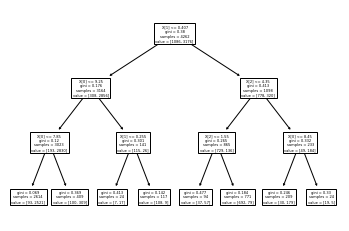

In [ ]:
from sklearn import tree
tree.plot_tree(tr);

In [ ]:
y_pred2=tr.predict(X_test)
print("Prediction of test data:",y_pred2)

Prediction of test data: ['red' 'red' 'white' ... 'red' 'white' 'white']


In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred2))

0.9118198874296435


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors =1)
knn= knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
print("Prediction of test data:",y_pred1)
X_test.head(10)
## accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred1))

Prediction of test data: ['red' 'white' 'white' ... 'red' 'red' 'white']
0.9352720450281425


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
wine_feature

,fixed acidity,volatile acidity,residual sugar,pH,alcohol
0,7.0,0.270,20.7,3.00,8.8
1,6.3,0.300,1.6,3.30,9.5
2,8.1,0.280,6.9,3.26,10.1
3,7.2,0.230,8.5,3.19,9.9
6,6.2,0.320,7.0,3.18,9.6
...,...,...,...,...,...
6491,6.8,0.620,1.9,3.42,9.5
6492,6.2,0.600,2.0,3.45,10.5
6493,5.9,0.550,2.2,3.52,11.2
6495,5.9,0.645,2.0,3.57,10.2


In [ ]:
new_wine=[[3.8,0.311,12.0,3.75,12.5]]
new_wine=pd.DataFrame(new_wine)
new_pred=lr.predict(new_wine)
print(new_pred)

['white']
